In [345]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import scipy
from random import randint
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.preprocessing import normalize
from math import sqrt
from __future__ import division
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures, normalize, MinMaxScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set_style("darkgrid")

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


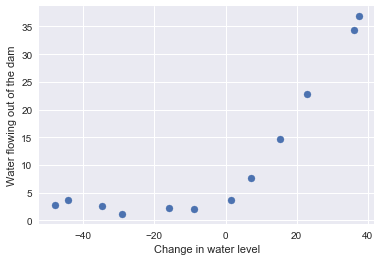

((12, 1), (12, 1))
((21, 1), (21, 1))
((21, 1), (21, 1))


In [346]:
data = loadmat('ex5data1.mat')
print data.keys()
X = np.array(data['X'])
y = np.array(data['y'])
Xtest = np.array(data['Xtest'])
ytest = np.array(data['ytest'])
Xval = np.array(data['Xval'])
yval = np.array(data['yval'])

plt.scatter(X, y)
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

print (X.shape, y.shape)
print (Xval.shape, yval.shape)
print (Xtest.shape, ytest.shape)

In [347]:
def cost(thetas, X, y, lamb):
    m, n = X.shape
    XX = np.append(np.ones((m, 1)), X, axis=1)
#     print XX.shape, thetas.shape
    h = XX.dot(thetas.T)
    return (1/(2*m))*np.sum(np.square(h - (y))) + (lamb/2*m) * np.sum(np.square(thetas))

m, n = X.shape
thetas = np.ones((1, n+1))
print 'Initial cost', cost(thetas, X, y, 0)

Initial cost 303.951525554


In [348]:
def gradient(thetas, X, y, lamb):
    m, n = X.shape
    XX = np.append(np.ones((m, 1)), X, axis=1)
#     print XX.shape, thetas.shape
    h = XX.dot(thetas.T)
    return (((1/(m))*(h - (y)).T.dot(XX) + (lamb/m) * (thetas)) - thetas[0]*lamb/m).flatten()

print gradient(thetas, X, y, 0)

[ -15.30301567  598.16741084]


[ 13.08790734   0.36777925]


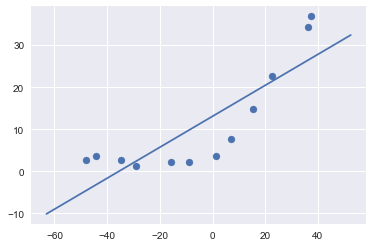

In [349]:
thetasopt = minimize(cost, thetas, args=(X, y.flatten(), 0), jac=gradient, method='CG').x
print thetasopt
Xr = np.linspace(X.min() - 15, X.max() + 15)
Yopt = thetasopt[0] + Xr*thetasopt[1]
plt.scatter(X, y)
display(plt.plot(Xr, Yopt))

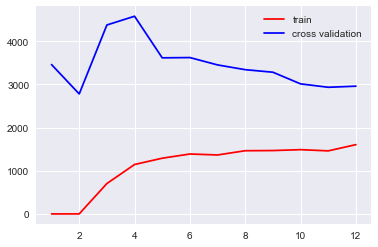

In [350]:
def learningCurve(X, y, Xval, yval, lamb):
    m, n = X.shape
    thetas = np.zeros((1, n+1))
    err_train = np.zeros((m, 1))
    err_cross = np.zeros((m, 1))
    
    for i in range(0, m):
        Xbatch, ybatch = X[0:i+1], y[0:i+1]
        thetasopt = minimize(cost, thetas, args=(Xbatch, ybatch.flatten(), lamb), jac=gradient, method='CG').x
        err_train[i] = cost(thetasopt, Xbatch, ybatch, lamb)
        err_cross[i] = cost(thetasopt, Xval, yval, lamb)
    
    plt.plot(np.arange(1, m+1), err_train, 'r', label='train')
    plt.plot(np.arange(1, m+1), err_cross, 'b', label='cross validation')
    plt.legend()

learningCurve(X, y, Xval, yval, 0)

[  2.02843346e+00   2.02843346e+00   3.79479949e-01   1.70505578e-02
   2.22916430e-04  -2.52908490e-06  -1.26907032e-07  -1.32912200e-09]


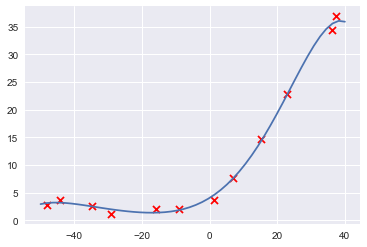

In [360]:
poly = PolynomialFeatures(6)
Xp = (poly.fit_transform(X))

thetas = np.zeros((1, Xp.shape[1]+1))
thetasopt = minimize(cost, thetas, args=(Xp, y.flatten(), 0),  method=None, jac=gradient).x
print thetasopt

Yr = thetasopt[0] + np.sum(poly.fit_transform(np.linspace(-50,40).reshape(-1, 1))*(thetasopt[1:]), axis=1)
plt.scatter(X, y, s=50, c='r', marker='x', linewidths=1)
plt.plot(np.linspace(-50,40), Yr)